📝 المهام المطلوبة:
1- تنظيف البيانات:

- عرض عدد القيم الفارغة في كل عمود.

- معالجة القيم الفارغة بطرق مناسبة.

- حذف الصفوف الفارغة تمامًا.

2- تحليل مالي:

- ما هو إجمالي الإنفاق الفعلي (Actual Spending) في كل قسم؟

- ما هو صافي الربح أو الخسارة الإجمالي لكل قسم؟

- ما هي الأشهر التي حققنا فيها أكبر ربح وأكبر خسارة؟

3- تحليل بصري:

- رسم خطي يوضح تطور "الربح/الخسارة" لكل قسم خلال الوقت.

- رسم شريطي لمقارنة "إجمالي الإنفاق" بين الأقسام.

4- حفظ نسخة نظيفة CSV من البيانات بعد المعالجة.



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv(r"C:\Users\games\Downloads\financial_dataset.csv")

In [3]:
df.head()

,Department,Month,Budget Allocated,Actual Spending,Revenue Generated,Profit or Loss
0,R&D,2021-03-01,44649.23,19683.16,5728.99,-13954.17
1,HR,2021-11-01,NaN,12660.96,46652.24,33991.28
2,Marketing,2022-01-01,17179.87,37090.63,44321.39,7230.76
3,Sales,2022-11-01,31151.50,21922.79,10219.85,-11702.94
4,Sales,2021-04-01,15558.42,47507.27,41403.95,-6103.32


In [4]:
columns = df.columns
for i, col in enumerate(columns, start=1):
    print(f"{i}- {col}")

1- Department
2- Month
3- Budget Allocated
4- Actual Spending
5- Revenue Generated
6- Profit or Loss


In [5]:
df.isnull().sum()

Department           12
Month                12
Budget Allocated     72
Actual Spending      70
Revenue Generated    71
Profit or Loss       12
dtype: int64

In [6]:
df_copy = df

In [7]:
df_copy.dropna(how='all', inplace=True)
df_copy.fillna(0, inplace=True)
df_copy.isnull().sum()
df_copy.head()
df_copy.tail()

,Department,Month,Budget Allocated,Actual Spending,Revenue Generated,Profit or Loss
1195,HR,2021-05-01,42202.43,22247.19,21357.16,-890.03
1196,Marketing,2021-10-01,5018.43,33967.04,60076.64,26109.60
1197,IT,2021-12-01,38179.76,54034.88,12248.85,-41786.03
1198,HR,2021-10-01,49926.45,3239.71,76283.34,73043.63
1199,R&D,2022-10-01,45167.26,0.00,66987.67,14368.16


In [8]:
df_copy.groupby('Department')['Actual Spending'].sum().sort_values()

Department
R&D           5169066.20
Sales         5348552.34
HR            5728984.56
Operations    5758501.67
IT            6200851.90
Marketing     6824117.37
Name: Actual Spending, dtype: float64

In [9]:
df_copy.groupby('Department')['Profit or Loss'].sum().sort_values()

Department
R&D           2714411.38
Sales         2815224.01
Marketing     3290889.47
IT            3303178.11
Operations    4276348.27
HR            5293427.72
Name: Profit or Loss, dtype: float64

In [11]:
df_copy['Month'] = pd.to_datetime(df_copy['Month'])
df_copy.insert(2 ,'Month Name', df['Month'].dt.strftime('%B'))
df_copy['Month Name']

0          March
1       November
2        January
3       November
4          April
          ...   
1195         May
1196     October
1197    December
1198     October
1199     October
Name: Month Name, Length: 1188, dtype: object

In [ ]:
mon_pr_lo = df_copy.groupby('Month Name')['Profit or Loss']

In [ ]:
mon_pr_lo.max().sort_values()

Month Name
February     82261.39
September    83184.40
August       83464.26
October      85689.65
June         85804.13
July         86191.87
April        86957.63
January      88347.70
May          92410.22
November     93426.30
December     93899.48
March        95614.40
Name: Profit or Loss, dtype: float64

In [ ]:
mon_pr_lo.min().sort_values()

Month Name
July        -54853.10
October     -53024.01
February    -52532.47
November    -51396.85
December    -50886.88
August      -50828.62
April       -49335.25
May         -48607.12
June        -48494.43
January     -48074.02
March       -46138.78
September   -41288.28
Name: Profit or Loss, dtype: float64

In [ ]:
df_copy.to_csv(r"D:\Learn\Python\Pandas\notebooks\Test\project\financial_dataset_Clean.csv", index=False)

In [ ]:
grouped = df_copy.groupby([df['Month'], 'Department'])['Profit or Loss'].mean().reset_index()

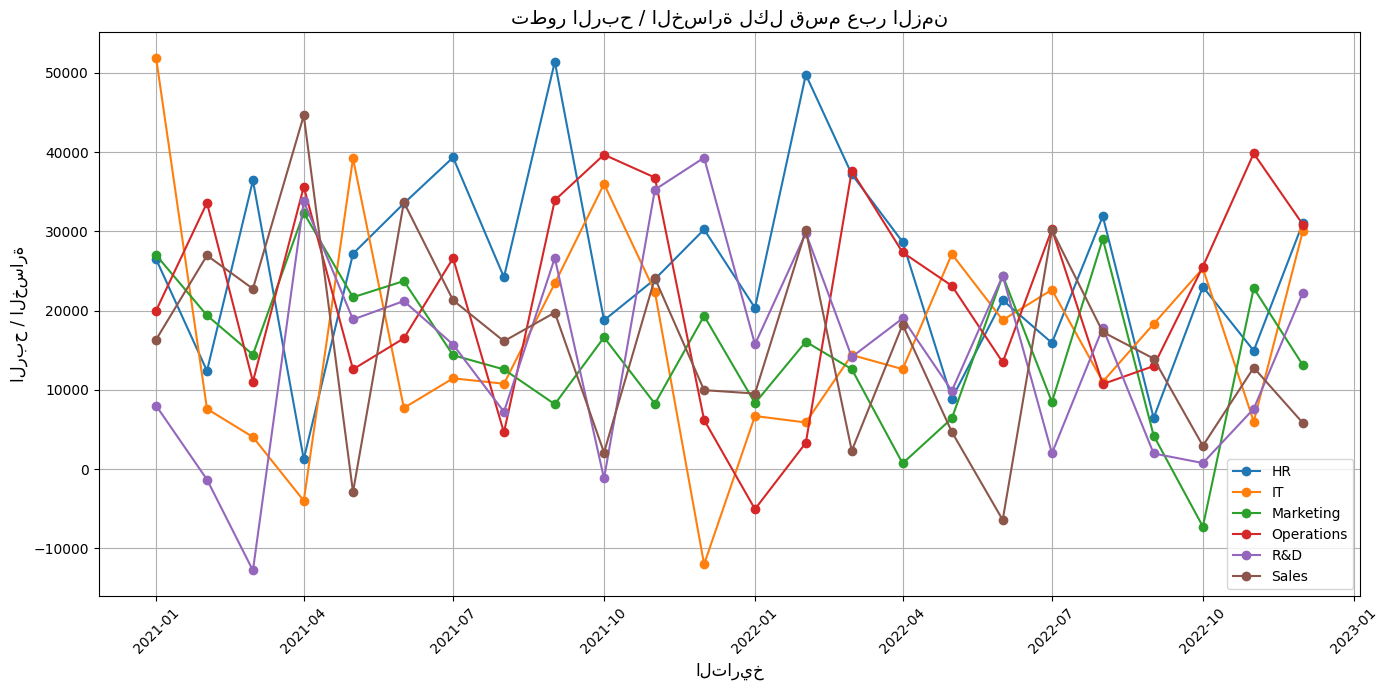

In [ ]:
plt.figure(figsize=(14, 7))

for dept in grouped['Department'].unique():
    dept_data = grouped[grouped['Department'] == dept]
    plt.plot(dept_data['Month'], dept_data['Profit or Loss'], marker='o', label=dept)

plt.title("تطور الربح / الخسارة لكل قسم عبر الزمن", fontsize=14)
plt.xlabel("التاريخ", fontsize=12)
plt.ylabel("الربح / الخسارة", fontsize=12)
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()

plt.show()

In [13]:
grouped1 = df.groupby('Department')['Actual Spending'].sum().sort_values()
grouped1

Department
R&D           5169066.20
Sales         5348552.34
HR            5728984.56
Operations    5758501.67
IT            6200851.90
Marketing     6824117.37
Name: Actual Spending, dtype: float64

C:\Users\games\AppData\Local\Temp\ipykernel_22032\3208465085.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(


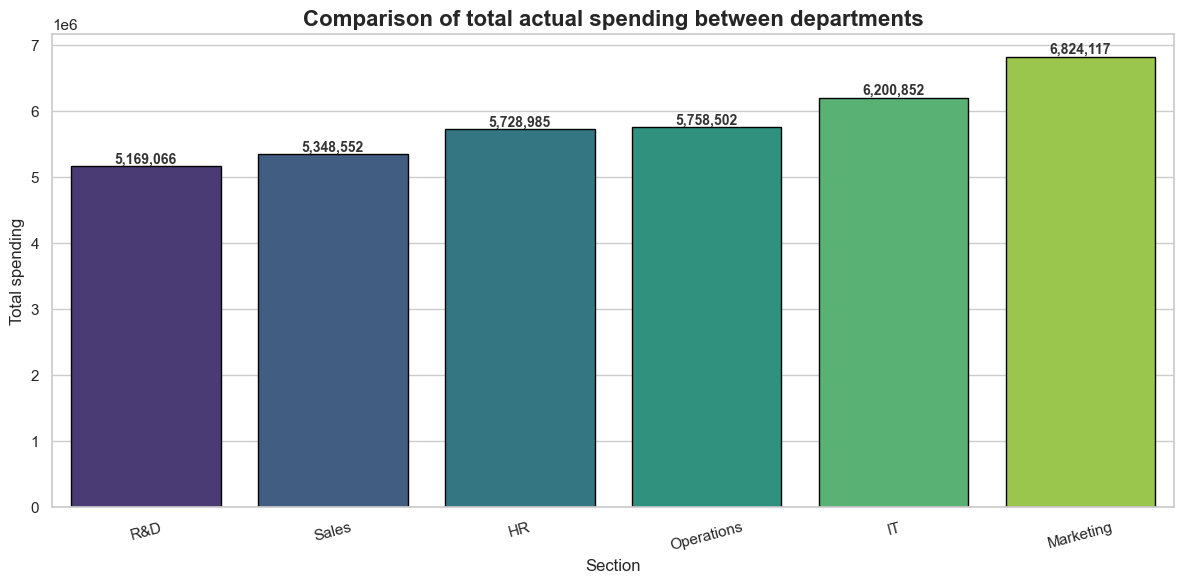

In [14]:
# إعداد الشكل العام
plt.figure(figsize=(12, 6))
sns.set_theme(style="whitegrid")

# رسم البار مع ألوان حديثة
barplot = sns.barplot(
    x=grouped1.index,
    y=grouped1.values,
    palette='viridis',  # ألوان حديثة جذابة
    edgecolor='black'
)

# كتابة القيم بشكل عصري داخل أو فوق الأعمدة
for i, val in enumerate(grouped1.values):
    barplot.text(
        i,
        val + 1000,  # المسافة فوق العمود
        f"{val:,.0f}",  # تنسيق الرقم بفواصل
        ha='center',
        va='bottom',
        fontsize=10,
        fontweight='bold',
        color='#333333'
    )

# تحسين العنوان والمحاور
plt.title('Comparison of total actual spending between departments', fontsize=16, weight='bold')
plt.xlabel('Section', fontsize=12)
plt.ylabel('Total spending', fontsize=12)
plt.xticks(rotation=15)
plt.tight_layout()
plt.show()


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [ ]:
df_copy.head()

,Department,Month,Month Name,Budget Allocated,Actual Spending,Revenue Generated,Profit or Loss
1182,Sales,2021-01-01,January,30530.73,30197.08,90833.67,60636.59
518,Marketing,2021-01-01,January,44620.57,0.00,1053.01,-20645.11
519,Operations,2021-01-01,January,33984.83,51386.99,84926.43,33539.44
556,HR,2021-01-01,January,45039.06,13950.20,65858.33,51908.13
856,Marketing,2021-01-01,January,7224.80,20417.77,0.00,28710.22


In [ ]:
df_train = df_copy
df_train.isnull().sum()

Department           0
Month                0
Month Name           0
Budget Allocated     0
Actual Spending      0
Revenue Generated    0
Profit or Loss       0
dtype: int64

In [ ]:
departments = df_train['Department'].unique()
departments

array(['Sales', 'Marketing', 'Operations', 'HR', 'R&D', 'IT'],
      dtype=object)

In [ ]:
dept_to_num = {}
for i, dept in enumerate(departments):
    dept_to_num[dept] = i
print(dept_to_num)

df_train['Department_Code'] = df_train['Department'].map(dept_to_num)
df_train

{'Sales': 0, 'Marketing': 1, 'Operations': 2, 'HR': 3, 'R&D': 4, 'IT': 5}


,Department,Month,Month Name,Budget Allocated,Actual Spending,Revenue Generated,Profit or Loss,Department_Code
1182,Sales,2021-01-01,January,30530.73,30197.08,90833.67,60636.59,0
518,Marketing,2021-01-01,January,44620.57,0.00,1053.01,-20645.11,1
519,Operations,2021-01-01,January,33984.83,51386.99,84926.43,33539.44,2
556,HR,2021-01-01,January,45039.06,13950.20,65858.33,51908.13,3
856,Marketing,2021-01-01,January,7224.80,20417.77,0.00,28710.22,1
...,...,...,...,...,...,...,...,...
654,Marketing,2022-12-01,December,13923.45,29074.83,44582.18,15507.35,1
954,IT,2022-12-01,December,6039.75,55158.01,90633.96,35475.95,5
662,Sales,2022-12-01,December,46075.22,43871.63,61137.40,17265.77,0
307,Sales,2022-12-01,December,41423.98,53174.66,0.00,-25351.75,0


In [ ]:
# df_train['Month'] = pd.to_datetime(df_train['Month'])
# df_train.insert(2, 'Month_num', df_train['Month'].dt.month)
df_train

,Department,Month,Month_num,Month Name,Budget Allocated,Actual Spending,Revenue Generated,Profit or Loss,Department_Code
1182,Sales,2021-01-01,1,January,30530.73,30197.08,90833.67,60636.59,0
518,Marketing,2021-01-01,1,January,44620.57,0.00,1053.01,-20645.11,1
519,Operations,2021-01-01,1,January,33984.83,51386.99,84926.43,33539.44,2
556,HR,2021-01-01,1,January,45039.06,13950.20,65858.33,51908.13,3
856,Marketing,2021-01-01,1,January,7224.80,20417.77,0.00,28710.22,1
...,...,...,...,...,...,...,...,...,...
654,Marketing,2022-12-01,12,December,13923.45,29074.83,44582.18,15507.35,1
954,IT,2022-12-01,12,December,6039.75,55158.01,90633.96,35475.95,5
662,Sales,2022-12-01,12,December,46075.22,43871.63,61137.40,17265.77,0
307,Sales,2022-12-01,12,December,41423.98,53174.66,0.00,-25351.75,0


In [ ]:
df_train['Month'] = pd.to_datetime(df_train['Month'])
df_train.insert(2, 'Years', df_train['Month'].dt.year)
df_train

,Department,Month,Years,Month_num,Month Name,Budget Allocated,Actual Spending,Revenue Generated,Profit or Loss,Department_Code
1182,Sales,2021-01-01,2021,1,January,30530.73,30197.08,90833.67,60636.59,0
518,Marketing,2021-01-01,2021,1,January,44620.57,0.00,1053.01,-20645.11,1
519,Operations,2021-01-01,2021,1,January,33984.83,51386.99,84926.43,33539.44,2
556,HR,2021-01-01,2021,1,January,45039.06,13950.20,65858.33,51908.13,3
856,Marketing,2021-01-01,2021,1,January,7224.80,20417.77,0.00,28710.22,1
...,...,...,...,...,...,...,...,...,...,...
654,Marketing,2022-12-01,2022,12,December,13923.45,29074.83,44582.18,15507.35,1
954,IT,2022-12-01,2022,12,December,6039.75,55158.01,90633.96,35475.95,5
662,Sales,2022-12-01,2022,12,December,46075.22,43871.63,61137.40,17265.77,0
307,Sales,2022-12-01,2022,12,December,41423.98,53174.66,0.00,-25351.75,0


In [ ]:
grouped_sum = df_train.groupby(['Years' ,'Month_num', 'Department_Code'])[['Budget Allocated', 'Actual Spending', 'Revenue Generated', 'Profit or Loss']].sum()
grouped_sum

Budget Allocated  Actual Spending  \
Years Month_num Department_Code                                      
2021  1         0                       195144.86        241733.74   
                1                       211652.00        170271.43   
                2                       233289.95        365502.33   
                3                       232279.13        218585.60   
                4                       278248.88        227719.34   
...                                           ...              ...   
2022  12        1                       256502.74        292647.68   
                2                       134840.48        167701.78   
                3                       138770.22        143441.90   
                4                       254527.16        164218.26   
                5                       185440.16        386985.15   

                                 Revenue Generated  Profit or Loss  
Years Month_num Department_Code                                     
2021  1         0                        334472.98       114418.69  
                1                        331904.35       189062.79  
                2                        545555.65       180053.32  
                3                        368212.68       185473.19  
                4                        219962.63        56021.48  
...                                            ...             ...  
2022  12        1                        430884.02       117894.63  
                2                        266618.57       154274.56  
                3                        330069.60       186627.70  
                4                        342522.44       178304.18  
                5                        657940.85       270955.70  

[144 rows x 4 columns]

In [ ]:
X = ['Years', 'Month_num', 'Department_Code', 'Budget Allocated', 'Actual Spending', 'Revenue Generated']
y = 'Profit or Loss'

In [ ]:
train = df_train[df_train['Years'] < 2023]
# تأكد من توفر بيانات 2023
if not df_train['Years'].eq(2023).any():
    print("⚠️ لا توجد بيانات لسنة 2023، سيتم استخدام بيانات 2022 كاختبار مؤقت.")
    test = df_train[df_train['Years'] == 2022]


X_train = train[X]
y_train = train[y]
X_test = test[X]
y_test = test[y]

⚠️ لا توجد بيانات لسنة 2023، سيتم استخدام بيانات 2022 كاختبار مؤقت.


In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
y_pred = model.predict(X_test)

# تقييم
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

# عرض النتائج
print(f"🔹 R² Score: {r2:.2f}")
print(f"🔹 MAE: {mae:.2f}")
print(f"🔹 MSE: {mse:.2f}")
print(f"🔹 RMSE: {rmse:.2f}")

🔹 R² Score: 0.80
🔹 MAE: 7416.23
🔹 MSE: 221417702.03
🔹 RMSE: 14880.11


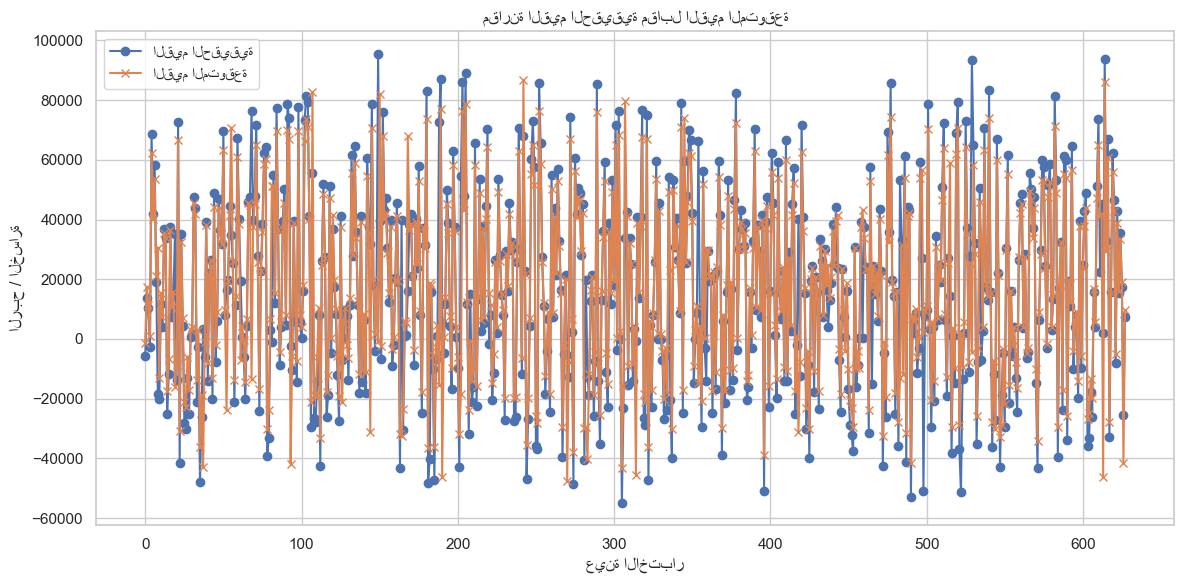

In [ ]:
if len(y_test) > 0 and len(y_pred) > 0:
    # إنشاء المخطط
    plt.figure(figsize=(12, 6))
    plt.plot(y_test.values, label='القيم الحقيقية', marker='o')
    plt.plot(y_pred, label='القيم المتوقعة', marker='x')
    plt.title("مقارنة القيم الحقيقية مقابل القيم المتوقعة")
    plt.xlabel("عينة الاختبار")
    plt.ylabel("الربح / الخسارة")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()
else:
    print("⚠️ لا توجد بيانات في y_test أو y_pred لرسم المخطط.")